# CS 5635 - Assignment 1
Jake Betenson | u0624782

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
np.random.seed(666)

In [175]:
#Datasets I used or considered using
congress_path = 'data/congress-terms.csv'
noaa_path = 'data/NOAA-Temperatures.csv'
birth_path = 'data/us birth data set.csv'
tarantino_path = 'data/tarantino.csv'
drug_path = 'data/drug-use-by-age.csv'
hate_path = 'data/hate_crimes.csv'
candy_path = 'data/candy-data.csv'
name_path = 'data/unisex_names_table.csv'

# Part 1: Generate your own data and Visualize

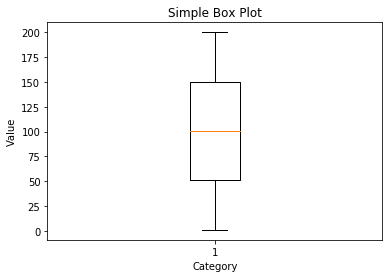

In [127]:
# 1. Create an array with 200 elements from 1 to 200 in order.  Create a box plot for visualization of your data.
box_dat = np.arange(1,201)
plt.boxplot(box_dat)
plt.title('Simple Box Plot')
plt.ylabel('Value')
plt.xlabel('Category')
plt.show()

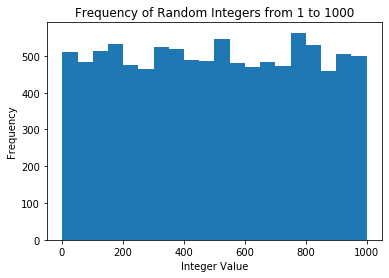

In [126]:
# 2. Create an array with 10,000 random numbers. Create a histogram of the data using 20 bins.
hist_dat = np.random.randint(1,1001,10000)
plt.hist(hist_dat,bins=20)
plt.title('Frequency of Random Integers from 1 to 1000')
plt.xlabel('Integer Value')
plt.ylabel('Frequency')
plt.show()

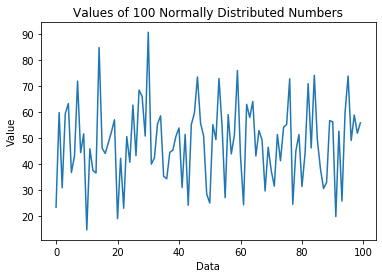

In [6]:
# 3. Write a program to generate 100 random numbers Gaussian distributed between 1 and 100. Write the numbers out to a binary file and use a line graph to draw the 100 numbers.
#use empirical rule to find 50 + 3s = 100 -> s = 50/3
line_dat = np.random.normal(loc=50,scale=50/3,size=100)
plt.plot(line_dat)
plt.title('Values of 100 Normally Distributed Numbers')
plt.xlabel('Data')
plt.ylabel('Value')

#write to binary
np.save(file='data/binary_test.npy', arr=line_dat)

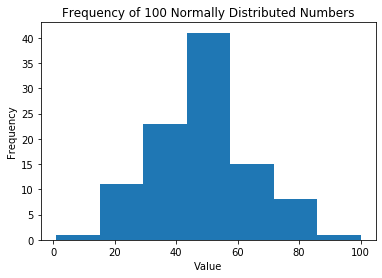

In [125]:
# 4. Write a program to read the binary file back, divide the range between 1 and 100 into 7 intervals, and calculate the frequency for each interval: Display a histogram of your result.
read_dat = np.load('data/binary_test.npy')
plt.hist(read_dat, bins=7, range=(1,100))
plt.title('Frequency of 100 Normally Distributed Numbers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

### Part 1 Summary
I'm already somewhat familiar with Numpy and MatPlotLib, so this was a good refresher on how to use both of those libraries.

# Part 2: Interesting Data Sets for Visualization



## 2.1 NOAA Land Ocean Temperature Anomalies

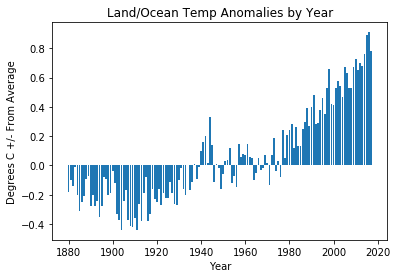

In [124]:
# 1. Download the NOAA Land Ocean Temperature Anomalies Data Set: https://my.eng.utah.edu/~cs6635/NOAA-Temperatures.csv. Create a bar plot of the data. Include a label called “Year” along the x-axis and a label called Degrees F +/- From Average along the y-axis. Describe trends in the data
noaa_dat = np.genfromtxt(fname=noaa_path,skip_header=5,delimiter=',')
plt.bar(x=noaa_dat[:,0],height=noaa_dat[:,1])
plt.title('Land/Ocean Temp Anomalies by Year')
plt.ylabel('Degrees C +/- From Average')
plt.xlabel('Year')
plt.show()

### NOAA Analysis
The temperature anomalies appear to be linearly increasing every year since about 1910.  There are many possible reasons for this but one plausible explanation could link the increase with increased global industrialization, particularly with the industrialization of densely populated East Asia.

## 2.2 US Congress by Age

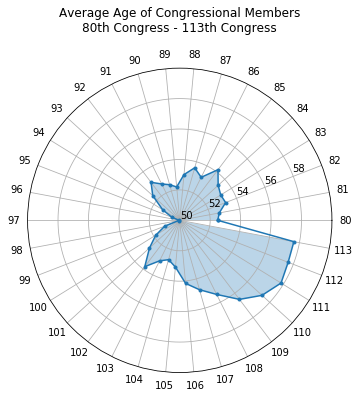

In [211]:
# 2. Download the member of Congress by Age data set: https://git.io/Jt45w2 Create a Star Plot of the data and create a Parallel Coordinates Plot of the data. Describe the trends in the data.

#congress_dat = np.genfromtxt(fname='congress-terms.csv',skip_header=1,delimiter=',')
congress_dat = np.genfromtxt(fname=congress_path,skip_header=1,delimiter=',')

#Polar Plot/Star Plot
#find average age of each congress
congresses = np.unique(congress_dat[:,0])
#print(f"The number of unique Congresses is {len(congresses)}")
categories = []
for c in range(len(congresses)):
    categories.append(str(int(congresses[c])))
avg_ages = []
age_dat = np.select((congress_dat[:,0]==congresses[0]),congress_dat)
for x in congresses:
    total_age = 0
    count = 0
    for row in range(congress_dat.shape[0]):
        if (congress_dat[row,0]==x):
            count = count + 1
            total_age = total_age + congress_dat[row,-1]
    avg_ages.append(total_age/count)   
    
N = len(avg_ages)
avg_ages += avg_ages[:1] #close the circle
angles = [n/float(N) * 2 * pi for n in range(N)]
angles += angles[:1] #close the circles

fig = plt.figure(figsize=(12,8))
ax = plt.subplot(121, polar='True')
plt.polar(angles, avg_ages, marker='.')
plt.fill(angles,avg_ages,alpha=0.3)
plt.xticks(angles[:-1], categories)
plt.yticks([50, 52, 54, 56, 58])
plt.ylim(50,60)
plt.title('Average Age of Congressional Members\n80th Congress - 113th Congress\n')
plt.show()

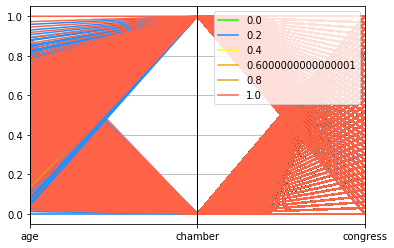

In [29]:
# Parallel Coordinates Plot
# encoding notes
# Incumbent 1-> yes 0-> no
# Party 0-> AL, 1-> D, 2-> I,  3-> ID, 4-> L, 5-> R
df = pd.read_csv(congress_path,delimiter=',',header='infer')
#sort by chamber -> hit age, party, congress, incumbency

df = df[['chamber', 'age','congress','party']]
#print(df)
df_scaled = MinMaxScaler().fit_transform(df)
df_scaled = pd.DataFrame(data=df_scaled,columns=['chamber','age','congress','party'])
#print(df_scaled)
# print(df)
# print(df.party.unique())
pd.plotting.parallel_coordinates(df_scaled, 'party', 
                                cols=['age','chamber','congress'],
                                color=["lime","dodgerblue","yellow","orange","goldenrod","tomato"]
                                )

### Congress Age Trends
Each congress' arithmetic average age has steadily increased from about 51 to 58 year old between the 104th Congress to the 113th Congress.  This is a rapid increase given that it has hovered between 50 and 54 between the the 80th and 104th Congresses.  There doesn't appear to be any major correlation between party, chamber, and age.  All members of the two major parties appear in various age groups and chambers across the 80th-113th Congresses. I had to do some encoding and normalization to make sure the parallel coordinates plot would work.  I didn't find it very helpful for this particular dataset since much of it was categorical and not continuous.  My small experience with these types of plots seems to indicate that continuous variables are far more useful for this type of visualization.

### Encoding notes for Political Party
Green -> AL

Blue -> D

Yellow -> I

Orange -> ID

Goldenrod -> L

Red -> R

## 2.3 US Birth Data Set

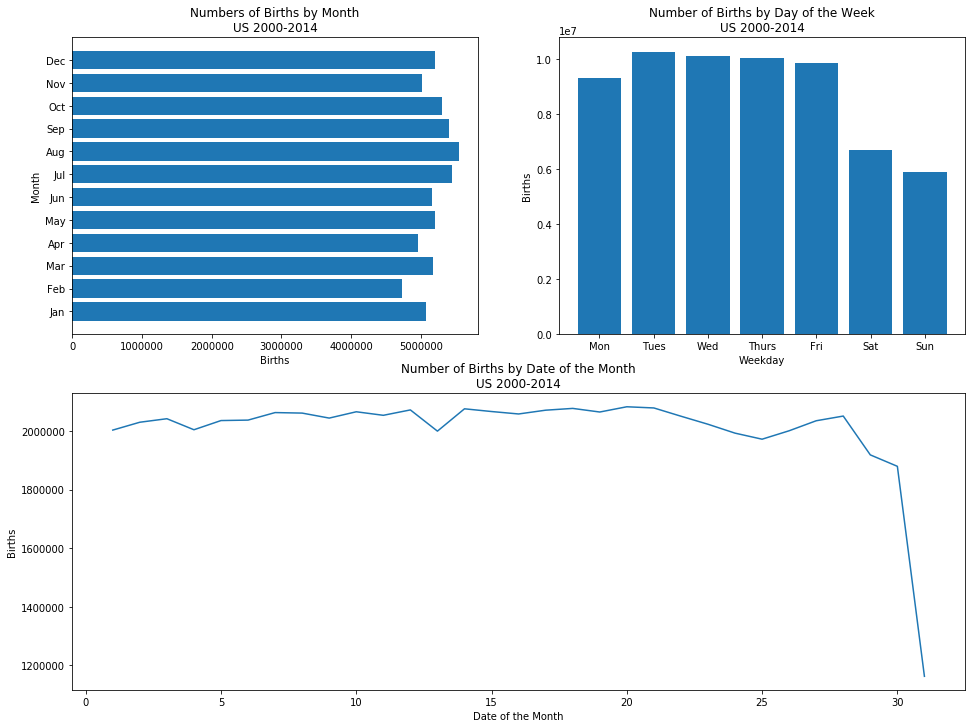

In [123]:
# 3. Download the U.S. Birth data set: https://git.io/Jt45X. What day of the month had the highest number of births? What day of the month had the lowest number of births? Are there any interesting trends in the data, i.e. more births in Summer or Winter? What about births on Friday the 13th?
birth_dat = pd.read_csv(birth_path)
fig = plt.figure(figsize=(16,12))

#month data
ax=plt.subplot(221)
month_dat = birth_dat[['month','births']].groupby(['month']).sum()
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
x=np.arange(1,13)
plt.barh(x, month_dat.to_numpy().T[0,:])
plt.title('Numbers of Births by Month\nUS 2000-2014')
plt.xlabel('Births')
plt.ylabel('Month')
plt.yticks(x, Months)

#date data
ax=plt.subplot(212)
date_dat = birth_dat[['date_of_month','births']].groupby(['date_of_month']).sum()
plt.plot(np.arange(1,32),date_dat.to_numpy())
plt.title('Number of Births by Date of the Month\nUS 2000-2014')
plt.xlabel('Date of the Month')
plt.ylabel('Births')

#weekday data
ax=plt.subplot(222)
day_dat = birth_dat[['day_of_week','births']].groupby(['day_of_week']).sum()
x=np.arange(1,8)
plt.bar(x,day_dat.to_numpy().T[0,:])
plt.title('Number of Births by Day of the Week\nUS 2000-2014')
plt.xlabel('Weekday')
plt.ylabel('Births')
weekdays = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
plt.xticks(x,weekdays)
plt.show()

In [213]:
#Stats of Note, Tables
#print(f"the month with the most births is: {month_dat['births'].argmax()} with a total of {month_dat['births'].max()} births\n")
day = birth_dat[['date_of_month','births']]
print(day.groupby(['date_of_month']).sum())
f13 = birth_dat[['day_of_week','date_of_month','births']]
f13.loc[(f13['day_of_week'].isin([1,2,3,4,5,6,7])) & (f13['date_of_month'] == 13)].groupby(['day_of_week','date_of_month']).sum()

                births
date_of_month         
1              2003627
2              2030447
3              2042441
4              2004785
5              2036185
6              2037729
7              2063416
8              2061652
9              2044600
10             2066154
11             2054098
12             2072483
13             2000064
14             2076291
15             2066999
16             2058651
17             2071572
18             2077673
19             2065328
20             2083247
21             2079198
22             2051012
23             2023555
24             1993203
25             1972534
26             2001311
27             2035483
28             2051528
29             1918965
30             1879925
31             1162868


births
day_of_week date_of_month        
1           13             283333
2           13             334490
3           13             318401
4           13             351784
5           13             298749
6           13             213769
7           13             199538

### US Births Analysis 2000-2014

I found this to be one of the more interesting datasets we looked at.  The 20th day of the month has the most births, while the 31st has the least.  There's a pretty steep delcine in births happening on the 29th-31st.  This is reasonable given that not every month has those dates in them.  There's a sharp dip on the 13th of the month but not an added dip for Friday, the 13th.  In fact, birth trends for the 13th day of the month follow the birth trends for your typical weekday.  Specifically, there are more births during the middle of the week with a steep decline on the weekends.  August has the most births of any month, with February having the least.  This is mirrored in the seasonal categories, with Summer having the most births and Winter having the least.

## 2.4 FiveThirtyEight Interesting Datasets

### Tarantino's Potty Mouth

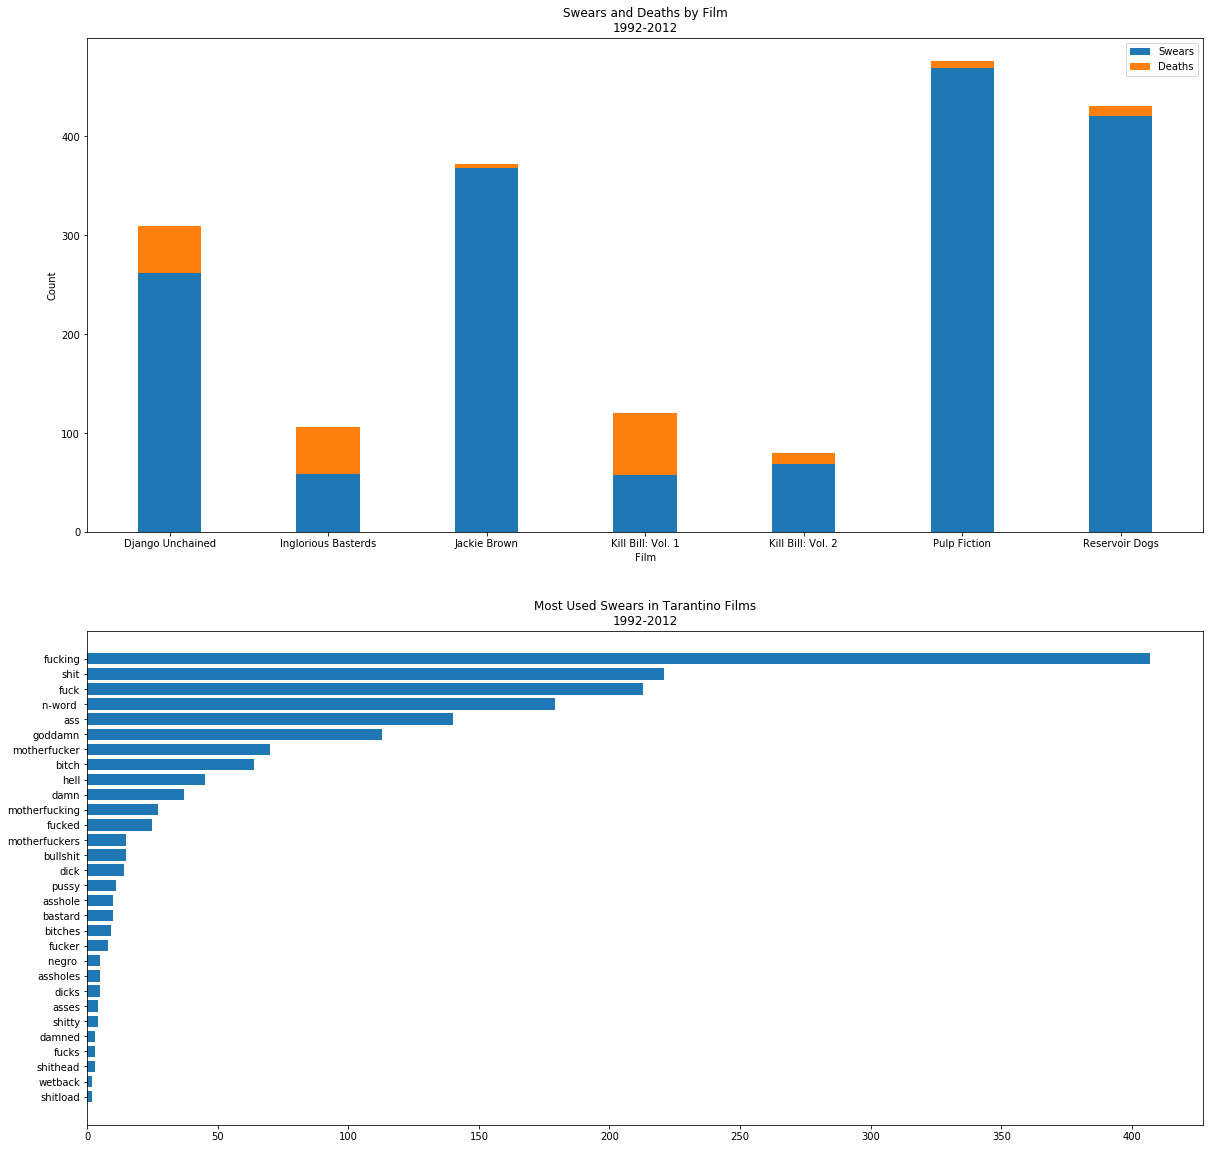

In [216]:
# 4. Five Thirty Eight maintains a sever with many interesting datasets: https://github.com/fivethirtyeight/data . Choose 3 different data sets to visualize. Visualize each data set in a different way. Describe the trends in the data.
tino_dat = pd.read_csv(tarantino_path)
word_dat = tino_dat.loc[(tino_dat['type'] != 'death')]
death_dat = tino_dat.loc[(tino_dat['type'] != 'word')]

movies = np.sort(tino_dat.movie.unique())
swears = np.sort(word_dat.word.unique())
deaths_movie = death_dat[['movie','type']].groupby(['movie']).count().to_numpy().T[0,:]

swears_movie = word_dat[['movie','word']].groupby(['movie']).count().to_numpy().T[0,:]
fig = plt.figure(figsize=(20,20))
ax = plt.subplot(211)
ind = np.arange(len(movies))
p1 = plt.bar(ind, swears_movie, .4)
p2 = plt.bar(ind, deaths_movie, .4, bottom=swears_movie)

plt.ylabel('Count')
plt.xlabel('Film')
plt.title('Swears and Deaths by Film\n1992-2012')
plt.xticks(ind, movies)
plt.legend((p1[0],p2[0]), ('Swears', 'Deaths'))

ax = plt.subplot(212)
x_swears = np.sort(word_dat.word.unique())
top_swears = word_dat[['movie','word']].groupby(['word']).count().to_numpy().T[0,:]
ind = np.arange(len(swears))
swears = swears.reshape((len(swears),1))
top_swears = top_swears.reshape((len(top_swears),1))
np_swears = np.concatenate((swears,top_swears), axis=1)
np_swears = np_swears[np_swears[:,1].argsort()]
ax.barh(ind[30:60], np_swears[30:60,1].T,.75)
ax.set_yticks(ind[30:60])
ax.set_yticklabels(np_swears[30:60,0].T)
ax.set_title('Most Used Swears in Tarantino Films\n1992-2012')
plt.show()

### Tarantino Trends and Stats

These visualizations cover films that Quentin Tarantino wrote and directed from 1992-2012.  The most obvious infromation to gleaned from the dataset is that Tarantion writes scripts with lots of cursing in them.  So much cursing, in fact, that he must love cursin strictly as a hobby.  His earliest films (Jackie Brown, Reservoir Dogs, Pulp Fiction) have the highest number of curses in them, with Pulp Fiction having the most. Looking at the content of the curses, "fucking" is far and away his most used curse with over 400 uses on screen, several variations of "fuck" occur throughout the list making it his most used swear.  "Shit" is the second most popular curse at around 240 uses, with "fuck" coming in third at just over 200 uses.  The racial slur, "n*****", is the fourth most used swear and has almost all of its content in the film Django Unchained, a story set in the Antebellum South.  Tarantino's films feature gratuitous violence but feature far fewer deaths than some of the highest box office successes.  For instance, none of the films in the visualization have over 100 deaths on screen.  The Lord of the Rings: The Return of the King features 2,798 deaths on screen and it's only the the 4th most deadly Hollywood film.

### Candy Power Rankings

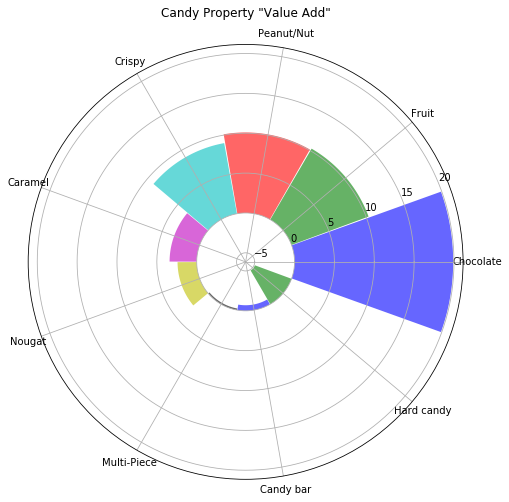

In [165]:
#Candy data taken https://fivethirtyeight.com/videos/the-ultimate-halloween-candy-power-ranking/
fig = plt.figure(figsize=(14,8))
value_add = [19.9, 10.3, 10.1, 9.0, 3.4, 2.4, -.2, -.7, -4.9]
ind = np.arange(len(value_add))
labels = ['Chocolate', 'Fruit', 'Peanut/Nut', 'Crispy', 'Caramel', 'Nougat', 'Multi-Piece', 'Candy bar', 'Hard candy']
N = len(labels)
colors = ['b','g','r','c','m','y','k','b','g']
angles = np.linspace(0.0, 2 * np.pi, N, endpoint = False)
ax = plt.subplot(111, projection = 'polar')
ax.bar(angles, value_add, color = colors, alpha = .6, width = .69)
plt.xticks(angles,labels)
plt.title('Candy Property "Value Add"')
plt.show()

### Candy Power Rankings Trends

This dataset is the result of head to head matchups of 86 different funsize candies in about 269,000 online surveys.  Candies such as Reese's Peanut Butter cups, Snickers, Starburst, etc. were categorized by 9 attributes and, based on the candy's win percentage, observed to contribute to that candy's overall win rate.  Chocolate was clearly the king, if a candy had chocolate it won +19.9% more on average.  Hard candies performed the worst, losing you 4.9% on average.  While fruit was the second most powerful property, no fruity candies made it into the top 10.  Starburst was the first to appear at 13th.  

### Unisex Name Data

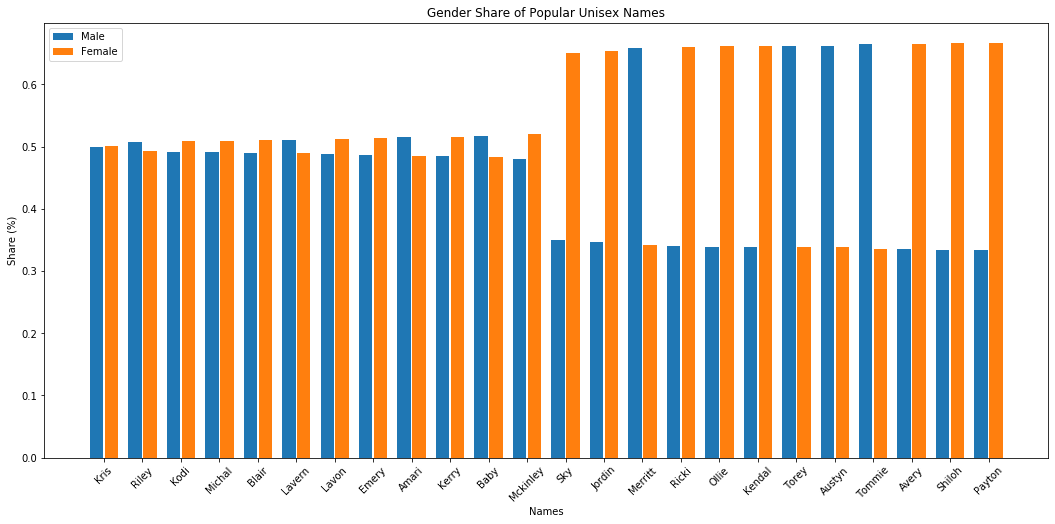

In [217]:
#Interesting Unisex Name Data
name_dat = pd.read_csv(filepath_or_buffer=name_path)
labels = name_dat['name'].to_numpy()
male_share = name_dat['male_share'].to_numpy()
female_share = name_dat['female_share'].to_numpy()

x = np.arange(len(labels))
width = .35
fig, ax = plt.subplots(figsize=(18,8))
bar1 = ax.bar(x-width/1.8,male_share, width, label='Male')
bar2 = ax.bar(x+width/1.8,female_share, width,  label='Female')

plt.ylabel('Share (%)')
plt.xlabel('Names')
plt.title('Gender Share of Popular Unisex Names')
plt.xticks(x,labels,rotation=45)
plt.legend()
plt.show()

### Unisex Names Analysis

This visualization attempts to show the unisex names that are most gender neutral and those that are the least.  I took the dataset and filtered it to the top 100 most popular unisex names, then took the 12 with the least difference in gender share and the 12 with the largest difference in gender share and plotted the gender share.  Kris is the most gender neutral name with an almost 50/50 split, with Riley at number two.  I found it interesting that Baby was on the list.  It would be interesting to plot this over time and see which names at the edge (high gap in gender share), become more gender neutral and which become more gendered.  Unfortunately this data is not available, but if I get my hands on it I'd like like to track a few names over time and see if there are any notable inversions (male-to-female or female-to-male). 

## Part 3: Questions on The Value of Visualization Paper

### 5. Why is assessing value of visualizations important? What are the two measures for deciding the value of visualizations?

### 6. Briefly describe a mathematical model for the visualization block shown in Fig. 1.

### 7. State four parameters that describe the costs associated with any visualization technique. 

### 8. What are the pros and cons of interactivity of visualizations?

## Conclusion
Lorum Ipsum